In [1]:
import numpy as np
from keras.datasets import mnist
from fc_net import *
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.warnings.filterwarnings('ignore')
np.random.seed(42)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print_shapes(X_train, y_train, X_test, y_test)
print("classes = ", list(np.unique(y_train)))

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)

x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)

classes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# data preprocessing 
X_train, y_train, X_test, y_test = prepare_data(X_train, y_train, X_test, y_test)
print_shapes(X_train, y_train, X_test, y_test)
X_train, X_test = scale_data(X_train, X_test)

x_train.shape = (60000, 784)
y_train.shape = (60000, 10)

x_test.shape = (10000, 784)
y_test.shape = (10000, 10)



In [4]:
hidden_dims = [20,7,5,10]
lr = 0.009
batch_size = 64
iters = 9000000
min_epochs=10

In [5]:
# batch sizes experiment
batch_experiment_results = {}
for batch_size in [32, 64, 128]:
    batch_experiment_results[batch_size] = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)

iteration step: 100 | cost: 1.9929418272856825
iteration step: 200 | cost: 1.6415828606469605
iteration step: 300 | cost: 1.1664078801241962
iteration step: 400 | cost: 1.4643497404477888
iteration step: 500 | cost: 1.3483032732270246
iteration step: 600 | cost: 1.5057481282193792
iteration step: 700 | cost: 1.0341471498593626
iteration step: 800 | cost: 1.0547695503340497
iteration step: 900 | cost: 0.9486647222918471
iteration step: 1000 | cost: 0.7944086760565121
iteration step: 1100 | cost: 0.682182098693257
iteration step: 1200 | cost: 0.7242378402144859
iteration step: 1300 | cost: 0.4833710686113633
iteration step: 1400 | cost: 0.5304477245361722
iteration step: 1500 | cost: 0.5169940331141559
iteration step: 1600 | cost: 0.9837315796305693
iteration step: 1700 | cost: 0.2491440041637772
iteration step: 1800 | cost: 0.4912357428951809
iteration step: 1900 | cost: 0.43981997783448346
iteration step: 2000 | cost: 0.43382506238954055
iteration step: 2100 | cost: 0.648471604163456
i

iteration step: 1900 | cost: 0.8397196482467836
iteration step: 2000 | cost: 0.6847269635169334
iteration step: 2100 | cost: 0.915645037091556
iteration step: 2200 | cost: 0.7878477670431303
iteration step: 2300 | cost: 0.8180529889486315
iteration step: 2400 | cost: 0.7227398202709485
iteration step: 2500 | cost: 0.8297743668867517
iteration step: 2600 | cost: 0.6455442952623579
iteration step: 2700 | cost: 0.5848199411229169
iteration step: 2800 | cost: 0.6074882712975287
iteration step: 2900 | cost: 0.6982784071702626
iteration step: 3000 | cost: 0.7392981508751492
iteration step: 3100 | cost: 0.5849318790967301
iteration step: 3200 | cost: 0.697560644282839
iteration step: 3300 | cost: 0.8107177252928123
iteration step: 3400 | cost: 0.5839346437329462
iteration step: 3500 | cost: 0.4205234596159205
iteration step: 3600 | cost: 0.6268577795724033
iteration step: 3700 | cost: 0.5573820167576936
iteration step: 3800 | cost: 0.5702197858568346
iteration step: 3900 | cost: 0.58179062357

In [7]:
def evaluate(experiment):
    costs, accs, train_accs, train_last_acc, test_acc, val_last_acc = experiment()
    
    draw_results(train_accs, accs, costs)
    
    print()
    print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}\n'.format(train_last_acc, val_last_acc, test_acc))

def draw_results(train_accs, val_accs, costs):   
    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(train_accs)
    axes[0].plot(val_accs)
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('iteration (x100)')
    axes[0].legend(['train', 'validation'], loc='best')

    # plot loss
    axes[1].plot(costs)
    axes[1].set_title('Model Cost')
    axes[1].set_ylabel('cost')
    axes[1].set_xlabel('iteration (x100)')
    

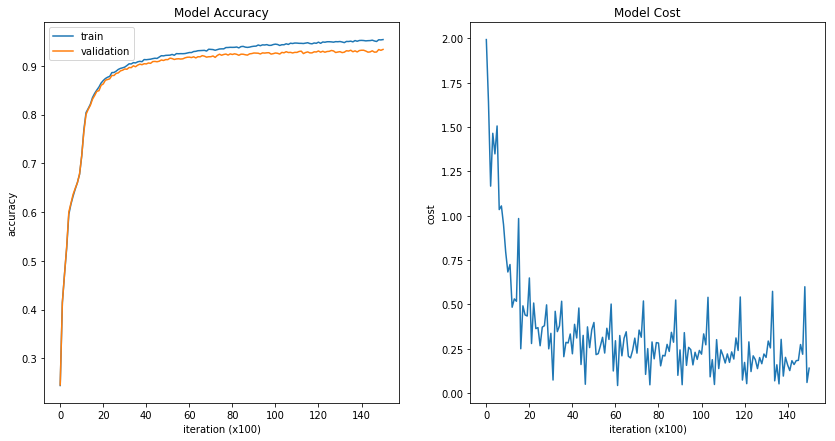

In [8]:
draw_results(batch_experiment_results[32][3], batch_experiment_results[32][2],  batch_experiment_results[32][1])

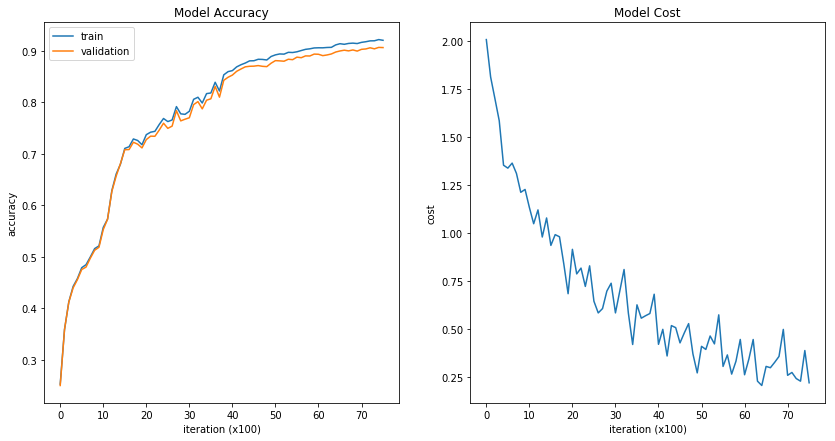

In [9]:
draw_results(batch_experiment_results[64][3], batch_experiment_results[64][2],  batch_experiment_results[64][1])

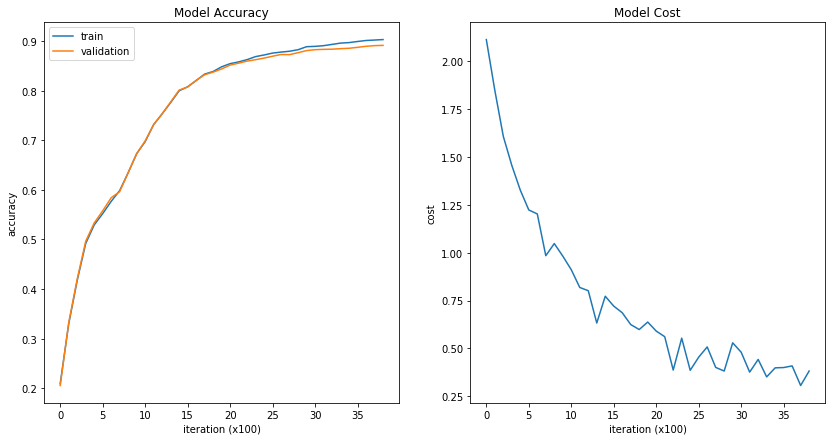

In [10]:
draw_results(batch_experiment_results[128][3], batch_experiment_results[128][2],  batch_experiment_results[128][1])

In [11]:
min_epochs=5
batch_size = 64


In [12]:
### Experiments
def no_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc


def yes_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=True, # yes batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=True) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc
    
    
def no_bn_yes_do():
    p=0.7
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=p, # yes dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc


iteration step: 100 | cost: 2.0346005268014893
iteration step: 200 | cost: 1.8159718969505267
iteration step: 300 | cost: 1.734170084937853
iteration step: 400 | cost: 1.611036636625342
iteration step: 500 | cost: 1.4206042132931733
iteration step: 600 | cost: 1.4032854781007638
iteration step: 700 | cost: 1.464447395586586
iteration step: 800 | cost: 1.0823943960867743
iteration step: 900 | cost: 1.1966442400044683
iteration step: 1000 | cost: 0.9689139898952108
iteration step: 1100 | cost: 1.2012145176209537
iteration step: 1200 | cost: 1.1391574312191572
iteration step: 1300 | cost: 0.7102079412208275
iteration step: 1400 | cost: 1.0343773889100814
iteration step: 1500 | cost: 0.8637446870855292
iteration step: 1600 | cost: 0.7534211989154362
iteration step: 1700 | cost: 0.8077560358886704
iteration step: 1800 | cost: 0.7367953276734462
iteration step: 1900 | cost: 0.6397787052640586
iteration step: 2000 | cost: 0.49236402425163417
iteration step: 2100 | cost: 0.7294492465839539
ite

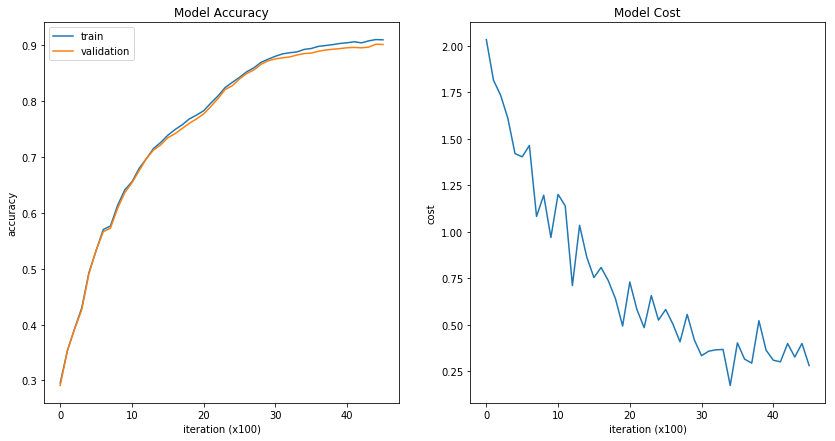

In [13]:
%%time
evaluate(no_bn_no_do)

iteration step: 100 | cost: 2.03199947819098
iteration step: 200 | cost: 1.7967604266160913
iteration step: 300 | cost: 1.7565366357368948
iteration step: 400 | cost: 1.6928154723586455
iteration step: 500 | cost: 1.7051515394963783
iteration step: 600 | cost: 1.6066073398914456
iteration step: 700 | cost: 1.582136193999254
iteration step: 800 | cost: 1.5438311398722036
iteration step: 900 | cost: 1.571445456292412
iteration step: 1000 | cost: 1.3450964165419201
iteration step: 1100 | cost: 1.59285985966214
iteration step: 1200 | cost: 1.38997300524034
iteration step: 1300 | cost: 1.113634875736572
iteration step: 1400 | cost: 1.2615457794225489
iteration step: 1500 | cost: 1.3550905691158381
iteration step: 1600 | cost: 1.2136804773115157
iteration step: 1700 | cost: 1.111135031818054
iteration step: 1800 | cost: 1.1642969127451375
iteration step: 1900 | cost: 1.0792107208119304
iteration step: 2000 | cost: 1.0889155234180656
iteration step: 2100 | cost: 1.099376833658062
iteration st

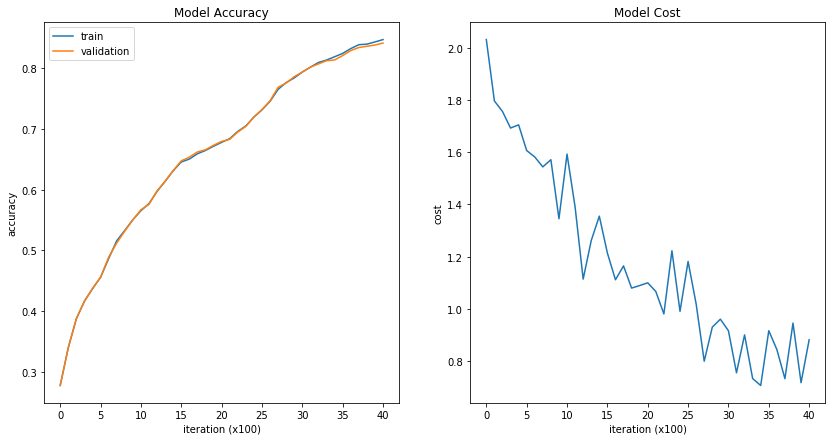

In [14]:
%%time
evaluate(yes_bn_no_do)

iteration step: 100 | cost: 2.309885287927894
iteration step: 200 | cost: 2.2498588711759107
iteration step: 300 | cost: 2.2204066547750285
iteration step: 400 | cost: 2.1457521060190583
iteration step: 500 | cost: 2.0824659111846
iteration step: 600 | cost: 2.144191818177586
iteration step: 700 | cost: 2.0188208823280127
iteration step: 800 | cost: 2.3906655578079827
iteration step: 900 | cost: 2.0107021161301484
iteration step: 1000 | cost: 1.9304322680224346
iteration step: 1100 | cost: 2.2639708712027145
iteration step: 1200 | cost: 1.9419944618415013
iteration step: 1300 | cost: 1.8660832587432004
iteration step: 1400 | cost: 2.1139741980465967
iteration step: 1500 | cost: 2.1876151986591026
iteration step: 1600 | cost: 1.9364931518181376
iteration step: 1700 | cost: 1.8953718382851585
iteration step: 1800 | cost: 1.8575235554358462
iteration step: 1900 | cost: 1.81950531402182
iteration step: 2000 | cost: 1.834577142471236
iteration step: 2100 | cost: 1.9991396381631579
iteration

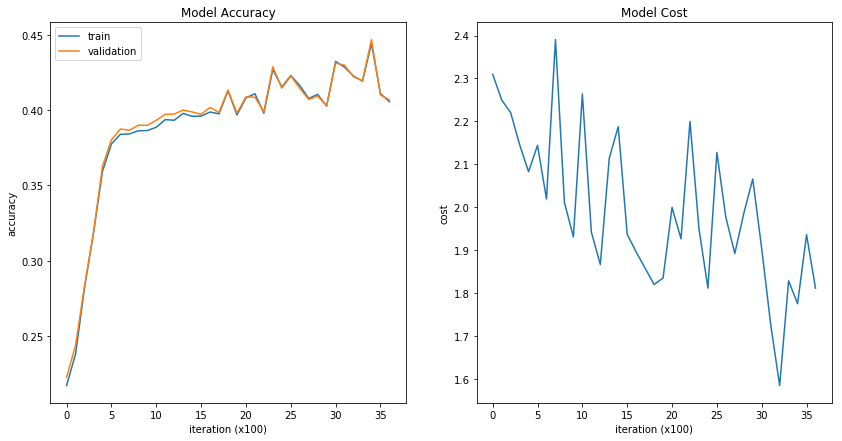

In [15]:
%%time
evaluate(no_bn_yes_do)

In [16]:
min_epochs=8

iteration step: 100 | cost: 2.3933148458525233
iteration step: 200 | cost: 2.2516009483681074
iteration step: 300 | cost: 2.286193429719605
iteration step: 400 | cost: 2.176560811878921
iteration step: 500 | cost: 2.2898066658552287
iteration step: 600 | cost: 2.1576505667723533
iteration step: 700 | cost: 2.2069328781648174
iteration step: 800 | cost: 2.313152459792756
iteration step: 900 | cost: 2.0473143057679932
iteration step: 1000 | cost: 2.2842488908545953
iteration step: 1100 | cost: 2.2171530069929766
iteration step: 1200 | cost: 2.1580211191623784
iteration step: 1300 | cost: 2.0545042793787722
iteration step: 1400 | cost: 2.0158658695796254
iteration step: 1500 | cost: 2.1868823733823692
iteration step: 1600 | cost: 2.093542641192113
iteration step: 1700 | cost: 1.9522268644307537
iteration step: 1800 | cost: 2.3369954402863145
iteration step: 1900 | cost: 1.8819673904939722
iteration step: 2000 | cost: 1.97841416662198
iteration step: 2100 | cost: 1.9263525682655787
iterati

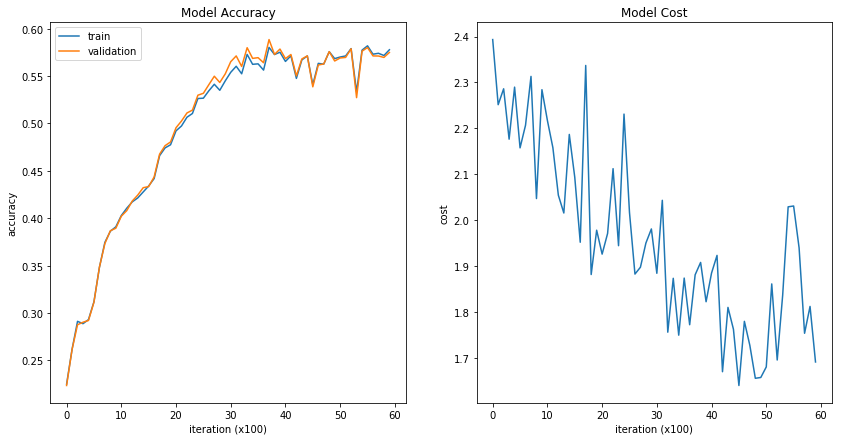

In [18]:
%%time
evaluate(no_bn_yes_do)

In [19]:
min_epochs=20 

iteration step: 100 | cost: 2.299853287914104
iteration step: 200 | cost: 2.3296302320606923
iteration step: 300 | cost: 2.3430223188977446
iteration step: 400 | cost: 2.1308834019465683
iteration step: 500 | cost: 2.472889624559335
iteration step: 600 | cost: 2.184453239017609
iteration step: 700 | cost: 2.174292792644326
iteration step: 800 | cost: 2.2182392462761125
iteration step: 900 | cost: 2.191786110625747
iteration step: 1000 | cost: 2.136155393489882
iteration step: 1100 | cost: 2.1131464001575866
iteration step: 1200 | cost: 2.092897137926493
iteration step: 1300 | cost: 2.103583525283793
iteration step: 1400 | cost: 2.050558673736586
iteration step: 1500 | cost: 1.9961871172510306
iteration step: 1600 | cost: 2.0956366842510237
iteration step: 1700 | cost: 2.020211006396419
iteration step: 1800 | cost: 1.9832762481598305
iteration step: 1900 | cost: 2.0005187745615207
iteration step: 2000 | cost: 1.943213793403553
iteration step: 2100 | cost: 1.9264292539490104
iteration st

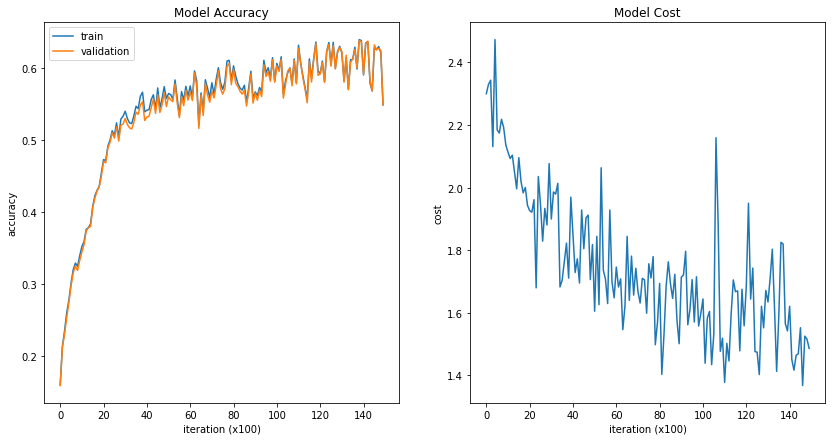

In [20]:
%%time
evaluate(no_bn_yes_do)